In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn import metrics

In [2]:
df_train=pd.read_csv('loan_data.csv')
df_test=pd.read_csv('loan_data.csv')
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
train_original=df_train.copy()
test_original=df_test.copy()
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("training misssing values")
print(missing_data.head(20))

training misssing values
                   Total   Percent
Credit_History        30  0.078740
Self_Employed         21  0.055118
Loan_Amount_Term      11  0.028871
Dependents             8  0.020997
Gender                 5  0.013123
Loan_ID                0  0.000000
Married                0  0.000000
Education              0  0.000000
ApplicantIncome        0  0.000000
CoapplicantIncome      0  0.000000
LoanAmount             0  0.000000
Property_Area          0  0.000000
Loan_Status            0  0.000000


In [4]:
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("test missing values")
print(missing_data.head(20))
df_train['Gender'] = df_train['Gender'].fillna(df_train['Gender'].dropna().mode().values[0] )



df_train['Married'] = df_train['Married'].fillna(df_train['Married'].dropna().mode().values[0] )
df_train['Dependents'] = df_train['Dependents'].fillna(df_train['Dependents'].dropna().mode().values[0] )
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(df_train['Self_Employed'].dropna().mode().values[0] )
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].dropna().median() )
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].dropna().mode().values[0] )
df_train['Credit_History'] = df_train['Credit_History'].fillna(df_train['Credit_History'].dropna().mode().values[0] )
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("training filled values")
print(missing_data.head(20))

test missing values
                   Total   Percent
Credit_History        30  0.078740
Self_Employed         21  0.055118
Loan_Amount_Term      11  0.028871
Dependents             8  0.020997
Gender                 5  0.013123
Loan_ID                0  0.000000
Married                0  0.000000
Education              0  0.000000
ApplicantIncome        0  0.000000
CoapplicantIncome      0  0.000000
LoanAmount             0  0.000000
Property_Area          0  0.000000
Loan_Status            0  0.000000
training filled values
                   Total  Percent
Loan_ID                0      0.0
Gender                 0      0.0
Married                0      0.0
Dependents             0      0.0
Education              0      0.0
Self_Employed          0      0.0
ApplicantIncome        0      0.0
CoapplicantIncome      0      0.0
LoanAmount             0      0.0
Loan_Amount_Term       0      0.0
Credit_History         0      0.0
Property_Area          0      0.0
Loan_Status            0 

In [5]:
df_test['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_test['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
df_test['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_test['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True)
df_test['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)
df_test['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True)
df_test['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace=True)
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)


missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("test filled values")
print(missing_data.head(20))

test filled values
                   Total  Percent
Loan_ID                0      0.0
Gender                 0      0.0
Married                0      0.0
Dependents             0      0.0
Education              0      0.0
Self_Employed          0      0.0
ApplicantIncome        0      0.0
CoapplicantIncome      0      0.0
LoanAmount             0      0.0
Loan_Amount_Term       0      0.0
Credit_History         0      0.0
Property_Area          0      0.0
Loan_Status            0      0.0


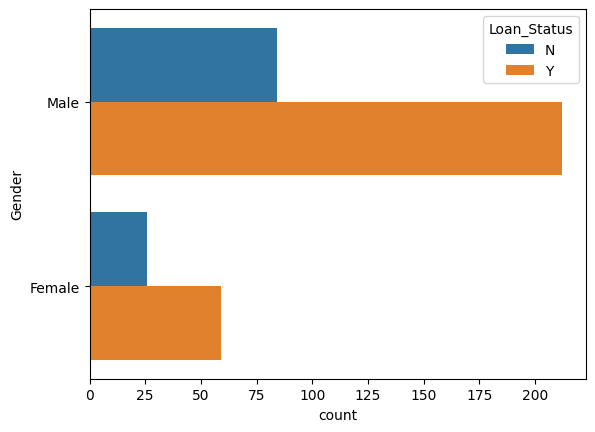

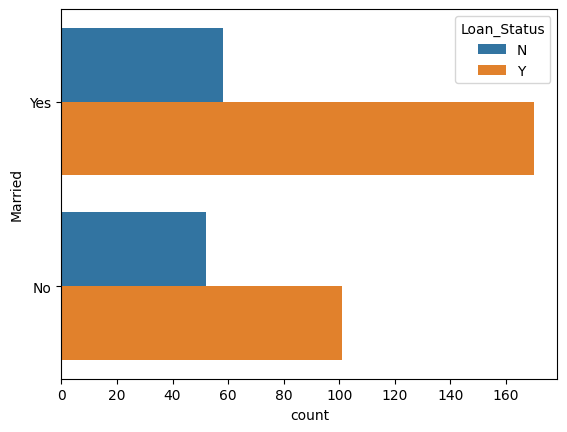

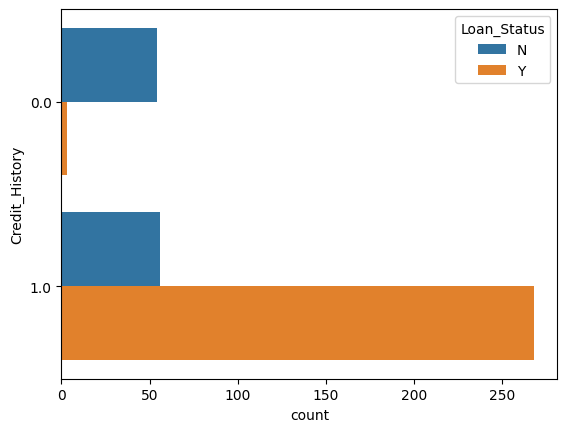

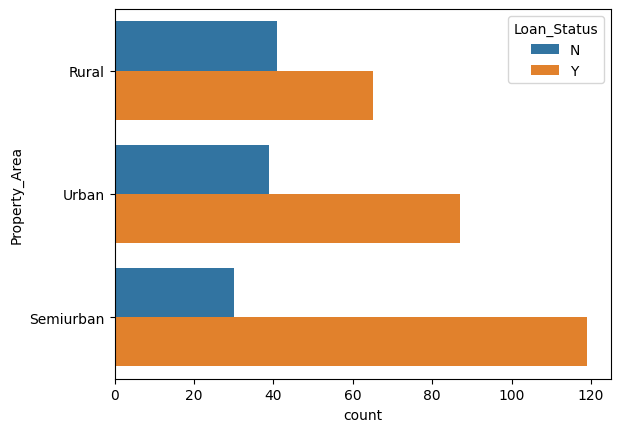

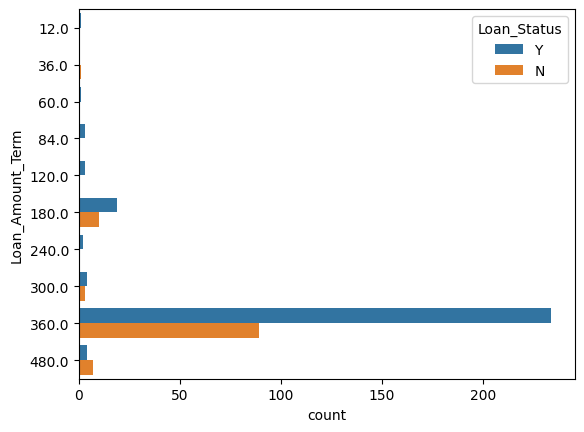

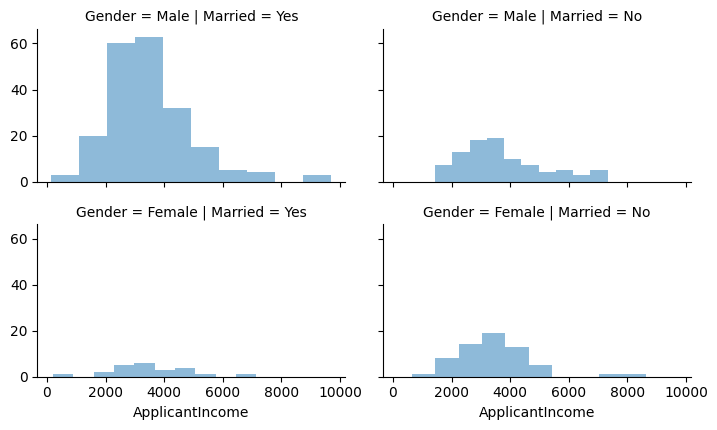

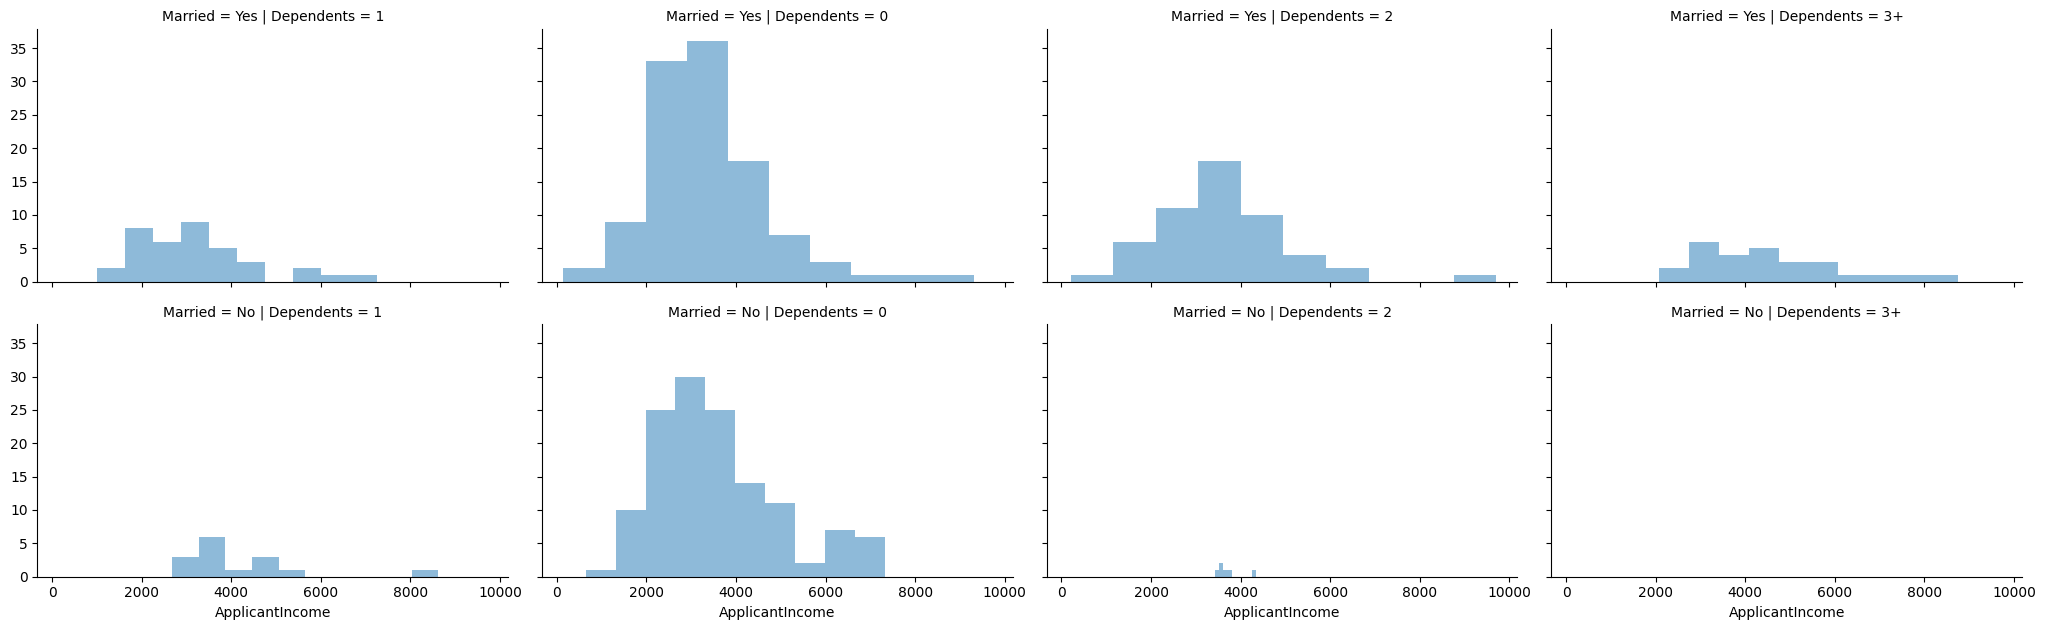

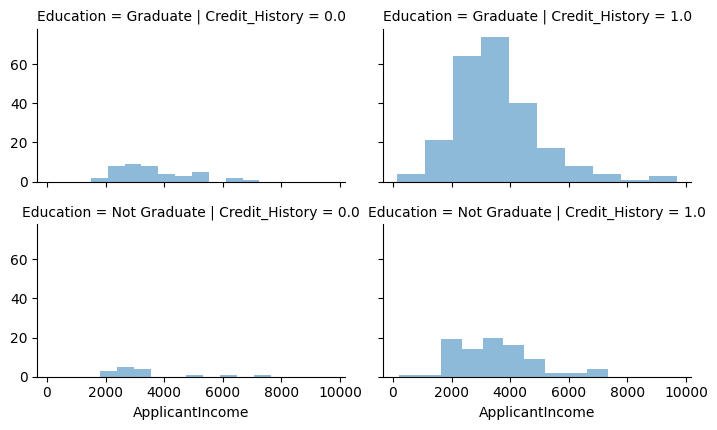

In [6]:
sns.countplot(y="Gender",hue="Loan_Status",data=df_train)
plt.show()
sns.countplot(y="Married",hue="Loan_Status",data=df_train)
plt.show()
sns.countplot(y="Credit_History",hue="Loan_Status",data=df_train)
plt.show()
sns.countplot(y="Property_Area",hue="Loan_Status",data=df_train)
plt.show()
sns.countplot(y="Loan_Amount_Term",hue="Loan_Status",data=df_train)
plt.show()
grid=sns.FacetGrid(df_train,row='Gender',col='Married',height=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()
plt.show()
grid=sns.FacetGrid(df_train,row='Married',col='Dependents',height=3.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()
plt.show()
grid=sns.FacetGrid(df_train,row='Education',col='Credit_History',height=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()
plt.show()




In [7]:
code_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}
df_train = df_train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
df_test = df_test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
print(df_train.to_string())
print(df_test.to_string())



      Loan_ID  Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status
0    LP001003       1        1          1          1              2             4583        1508.000000       128.0             360.0             1.0              1            0
1    LP001005       1        1          0          1              1             3000           0.000000        66.0             360.0             1.0              3            1
2    LP001006       1        1          0          2              2             2583        2358.000000       120.0             360.0             1.0              3            1
3    LP001008       1        2          0          1              2             6000           0.000000       141.0             360.0             1.0              3            1
4    LP001013       1        1          0          2              2             2333        1516.000000       

<ipython-input-7-258d7e6b72e4>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train = df_train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
<ipython-input-7-258d7e6b72e4>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_test = df_test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)


In [8]:
# Check if 'Loan_ID' exists in the DataFrame and drop it if it does
if 'Loan_ID' in df_train.columns:
    df_train = df_train.drop('Loan_ID', axis=1)
if 'Loan_ID' in df_test.columns:
    df_test = df_test.drop('Loan_ID', axis=1)


X = df_train.drop('Loan_Status', axis=1)
y = df_train['Loan_Status']

x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=1)

model = DecisionTreeClassifier(random_state=1)
model.fit(x_train, y_train)

pred_cv = model.predict(x_cv)
print(accuracy_score(y_cv, pred_cv))


0.7391304347826086



1 of kfold 5
accuracy_score 0.7532467532467533

2 of kfold 5
accuracy_score 0.8157894736842105

3 of kfold 5
accuracy_score 0.7894736842105263

4 of kfold 5
accuracy_score 0.7368421052631579

5 of kfold 5
accuracy_score 0.8289473684210527

Mean Validation Accuracy 0.7848598769651401


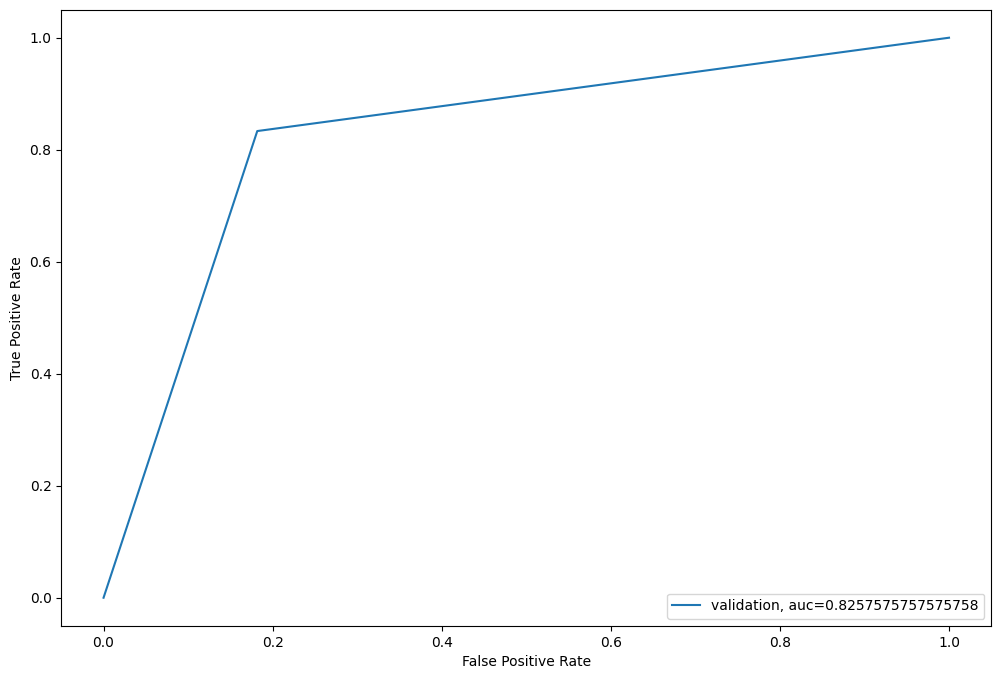

In [12]:
df_train = df_train.drop(columns='Loan_ID', errors='ignore')
df_test = df_test.drop(columns='Loan_ID', errors='ignore')

# Separating features and target variable
X = df_train.drop('Loan_Status', axis=1)  # Corrected the drop method
y = df_train['Loan_Status']  # Accessing 'Loan_Status' column

# Stratified K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
mean = 0
i = 1

for train_index, test_index in kf.split(X, y):
    print(f'\n{i} of kfold {kf.n_splits}')
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean += score
    print('accuracy_score', score)
    i += 1

print('\nMean Validation Accuracy', mean / (i - 1))

# Ensuring that df_test has the same features as X
df_test = df_test[X.columns]

# Making predictions on the test set
pred_test = model.predict(df_test)
pred = model.predict_proba(xvl)[:, 1]

submission = pd.DataFrame()
# ROC Curve and AUC
fpr, tpr, _ = roc_curve(yvl, pred)
auc = roc_auc_score(yvl, pred)
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label='validation, auc=' + str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


# Prepare submission file
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']  # Assuming test_original DataFrame is loaded and contains 'Loan_ID'
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)
submission.to_csv('final_result.csv', columns=['Loan_ID', 'Loan_Status'], index=False)